In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
loan_df = pd.read_csv("Loan payments data.csv")

### Data Content
Loan_id : A unique loan number assigned to each loan customers

Loan_status : Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal : Basic principal loan amount at the origination

terms : Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date : When the loan got originated and took effects

Due_date : Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time : The actual time a customer pays off the loan

Pastdue_days : How many days a loan has been past due

Age, education, gender : A customer’s basic demographic information

In [3]:
loan_df # .head() .tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [4]:
pivot_table = loan_df.pivot_table(
    index=["terms", "loan_status"],        # Y-axis
    columns="Principal",  # X-axis
    values="Loan_ID", # Values to count
    aggfunc="count",      # Count occurrences
    fill_value=0,         # Fill missing values with 0
    margins=True,         # Add row and column totals
    margins_name="Total"  # Name for the sum row/column
)

pivot_table

Principal                 300  500  700  800  900  1000  Total
terms loan_status                                             
7     COLLECTION_PAIDOFF    0    0    0    1    0     0      1
      PAIDOFF               6    1    0    1    1    11     20
15    COLLECTION            0    0    0   22    0    19     41
      COLLECTION_PAIDOFF    0    1    0   18    0    20     39
      PAIDOFF               0    1    1   63    1    61    127
30    COLLECTION            0    0    0    1    0    58     59
      COLLECTION_PAIDOFF    0    0    0    0    0    60     60
      PAIDOFF               0    0    0    5    0   148    153
Total                       6    3    1  111    2   377    500

#### 觀察：COLLECTION 用戶集中在較長周期且較高額區域

<Axes: xlabel='effective_date', ylabel='count'>

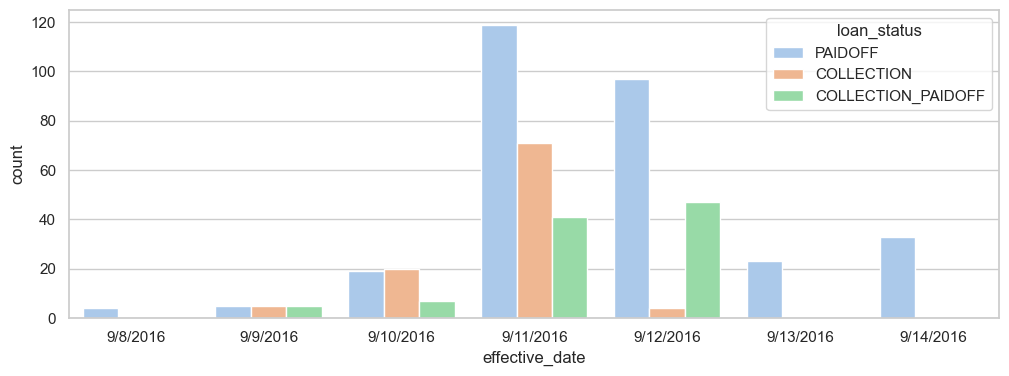

In [5]:
plt.figure(figsize = [12,4])
sns.countplot(data=loan_df, x='effective_date', hue='loan_status', palette='pastel')

#### 觀察：2016/9/12前 COLLECTION 用戶明顯較多，需確認為樣本不完全還是有特殊原因引起

<Axes: xlabel='loan_status', ylabel='count'>

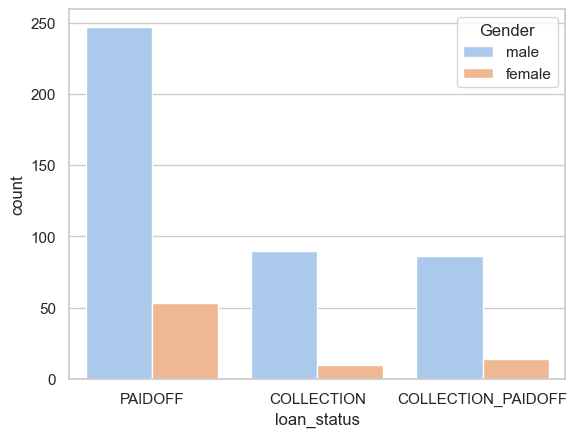

In [6]:
sns.countplot(data=loan_df, x="loan_status", hue="Gender", palette='pastel')

<Axes: xlabel='education', ylabel='count'>

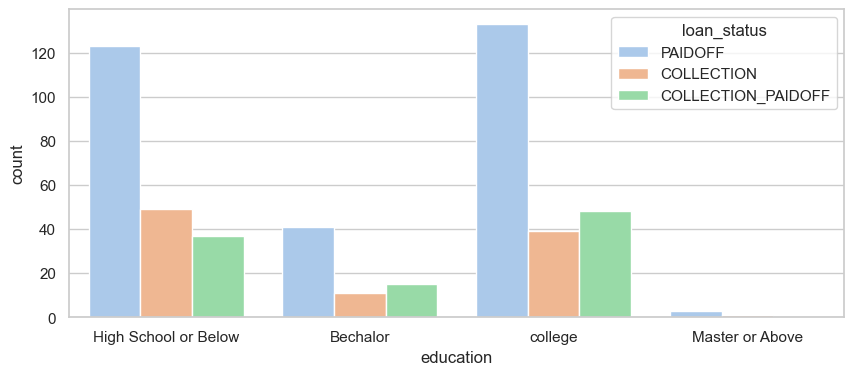

In [7]:
plt.figure(figsize = [10,4])
sns.countplot(data=loan_df, x="education", hue="loan_status", palette='pastel')

#### 觀察：高學歷相較之下有較低的 COLLECTION 用戶比率

In [8]:
px.scatter(loan_df, x="age", y="past_due_days", color="loan_status", log_x=True)

#### 觀察：COLLECTION_PAIDOFF 用戶大多在一個月內還清

In [9]:
loan_df_collection = loan_df.loc[loan_df["loan_status"]!="PAIDOFF",:]

In [10]:
loan_df_collection

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
300,xqd20160301,COLLECTION,1000,15,9/9/2016,9/23/2016,NaN,76.0,29,college,male
301,xqd20160302,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,37,High School or Below,male
302,xqd20160303,COLLECTION,1000,30,9/9/2016,10/8/2016,NaN,61.0,33,High School or Below,male
303,xqd20160304,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,27,college,male
304,xqd20160305,COLLECTION,800,15,9/9/2016,9/23/2016,NaN,76.0,24,Bechalor,male
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [11]:
pivot_table_collection = loan_df_collection.pivot_table(
    index="loan_status",        # Y-axis
    columns="education",  # X-axis
    values="Principal", # Values to count
    aggfunc="sum",      # Count occurrences
    fill_value=0,         # Fill missing values with 0
    margins=True,         # Add row and column totals
    margins_name="Total"  # Name for the sum row/column
)

pivot_table_collection

education,Bechalor,High School or Below,Master or Above,college,Total
loan_status,,,,,
COLLECTION,10200,47000,1000,37200,95400
COLLECTION_PAIDOFF,13900,36000,0,45800,95700
Total,24100,83000,1000,83000,191100


In [12]:
pivot_table_collection = loan_df_collection.pivot_table(
    index="Gender",      # Y-axis
    columns="loan_status",  # X-axis
    values="Principal", # Values to count
    aggfunc=["sum", "count"],      # Count occurrences
    fill_value=0,         # Fill missing values with 0
    margins=True,         # Add row and column totals
    margins_name="Total"  # Name for the sum row/column
)

pivot_table_collection.T

Gender                    female    male   Total
      loan_status                               
sum   COLLECTION            9600   85800   95400
      COLLECTION_PAIDOFF   13200   82500   95700
      Total                22800  168300  191100
count COLLECTION              10      90     100
      COLLECTION_PAIDOFF      14      86     100
      Total                   24     176     200

In [13]:
pivot_table_collection = loan_df_collection.pivot_table(
    index="education",      # Y-axis
    columns="loan_status",  # X-axis
    values="Principal", # Values to count
    aggfunc=["sum", "count"],      # Count occurrences
    fill_value=0,         # Fill missing values with 0
    margins=True,         # Add row and column totals
    margins_name="Total"  # Name for the sum row/column
)

pivot_table_collection.T

education                 Bechalor  High School or Below  Master or Above  \
      loan_status                                                           
sum   COLLECTION             10200                 47000             1000   
      COLLECTION_PAIDOFF     13900                 36000                0   
      Total                  24100                 83000             1000   
count COLLECTION                11                    49                1   
      COLLECTION_PAIDOFF        15                    37                0   
      Total                     26                    86                1   

education                 college   Total  
      loan_status                          
sum   COLLECTION            37200   95400  
      COLLECTION_PAIDOFF    45800   95700  
      Total                 83000  191100  
count COLLECTION               39     100  
      COLLECTION_PAIDOFF       48     100  
      Total                    87     200